In [181]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np


# Carregar o DataFrame a partir do arquivo CSV
df = pd.read_csv(r'C:\Users\mayco\Desktop\PROJETOS PYTHON\PYTHON\STACKOVERFLOW\BASE\TotalQuestions.csv')

# Converter a coluna 'Month' para o formato de data do pandas e extrair o ano
df['Year'] = pd.to_datetime(df['Month']).dt.year

# Selecionar apenas colunas numéricas para cálculo de soma
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Agrupar os dados pelo ano e calcular a soma das colunas numéricas
df_yearly_sum = df.groupby('Year')[numeric_columns].sum()

# Exibir o DataFrame resultante
df_yearly_sum



,C++,C#,TypeScript,PHP,Swift,Ruby,Go,SQL,Kotlin,Scala,Shell,C,HTML,Objective-C,Perl,Matlab,R,Python,Java,Javascript
Year,,,,,,,,,,,,,,,,,,,,
2008,2119,4962,0,1449,0,602,0,1340,0,14,167,766,964,279,360,35,8,1422,1839,2908
2009,15617,45931,1,20241,16,5188,76,11786,0,616,1135,6732,9574,6347,2667,597,521,12843,18719,23867
2010,31874,75236,0,51275,18,10154,149,19601,4,2074,2123,15230,22787,17870,5001,1811,2260,26962,43455,54235
2011,47727,112113,1,95033,58,18642,360,30621,13,4314,3540,22537,47367,38530,6726,3898,5822,41971,89500,98308
2012,62805,137625,501,130200,67,24241,919,42906,19,5516,5846,30851,74533,46431,7718,7201,12160,63947,135595,143772
2013,81722,164424,1139,165154,74,29180,2090,65212,25,8530,8637,40437,112294,47242,9689,11600,22155,95993,194706,189567
2014,82188,161788,1532,175680,15129,29903,3978,75416,81,10461,9659,41556,132456,48009,8749,13949,30738,115759,234079,215683
2015,79568,154195,3239,169443,49726,27945,5133,54734,432,12862,9576,39940,132207,35622,6495,13809,40572,136673,254767,214540
2016,71224,148457,13636,160271,56222,23999,6479,55631,1288,14695,9608,34446,126863,23296,5268,11509,44263,157924,263531,196181


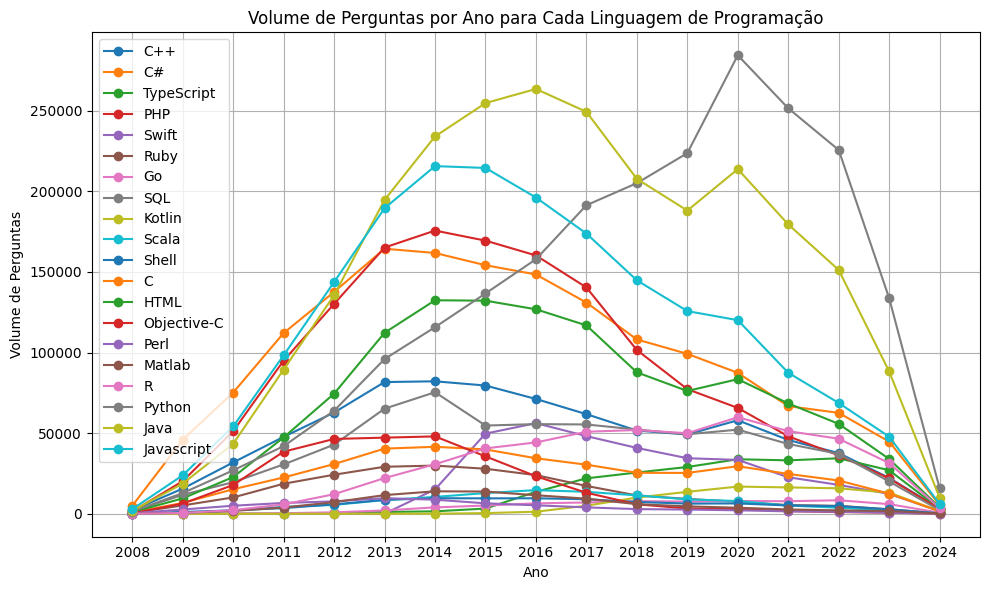

In [182]:
# Plotar os dados
plt.figure(figsize=(10, 6))

# Iterar sobre as colunas numéricas para plotar cada uma
for column in numeric_columns:
    plt.plot(df_yearly_sum.index, df_yearly_sum[column], marker='o', label=column)

# Adicionar rótulos aos eixos e título ao gráfico
plt.xlabel('Ano')
plt.ylabel('Volume de Perguntas')
plt.title('Volume de Perguntas por Ano para Cada Linguagem de Programação')
plt.legend()
plt.grid(True)

# Ajustar os ticks do eixo x para mostrar todos os anos
plt.xticks(df_yearly_sum.index)

# Mostrar o gráfico
plt.tight_layout()
plt.show()


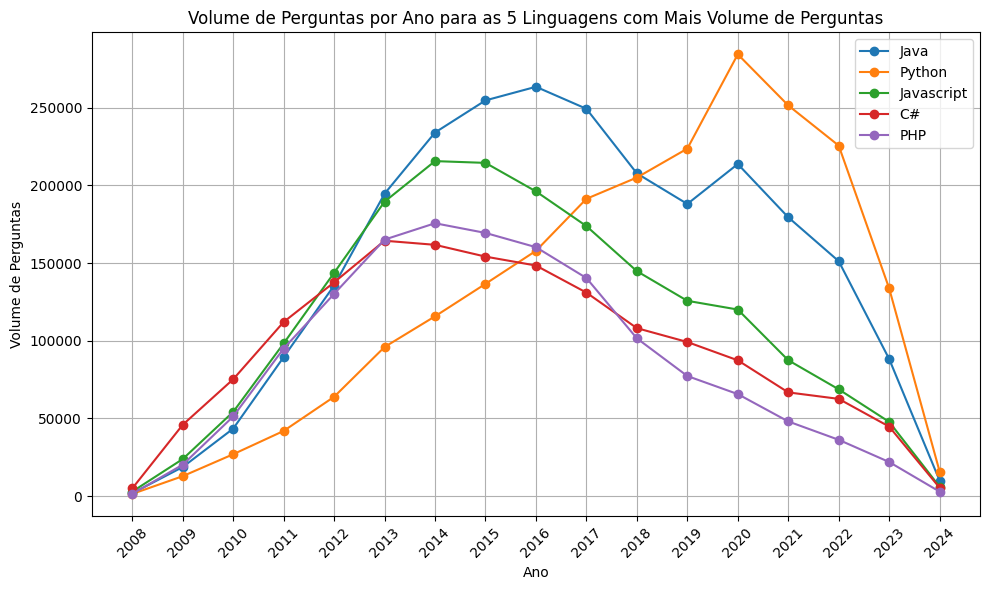

In [183]:

# Calcular o total de perguntas para cada linguagem ao longo de todos os anos
soma_por_linguagem = df_yearly_sum.sum()

# Selecionar as 5 linguagens com mais volume de perguntas
top_linguagens = soma_por_linguagem.nlargest(5).index

# Filtrar o DataFrame para incluir apenas as 5 linguagens com mais volume de perguntas
df_top_linguagens = df_yearly_sum[top_linguagens]

# Plotar os dados
plt.figure(figsize=(10, 6))

# Iterar sobre as linguagens com mais volume de perguntas para plotar cada uma
for linguagem in df_top_linguagens.columns:
    plt.plot(df_top_linguagens.index, df_top_linguagens[linguagem], marker='o', label=linguagem)

# Adicionar rótulos aos eixos e título ao gráfico
plt.xlabel('Ano')
plt.ylabel('Volume de Perguntas')
plt.title('Volume de Perguntas por Ano para as 5 Linguagens com Mais Volume de Perguntas')
plt.legend()
plt.grid(True)

# Ajustar os ticks do eixo x para incluir todos os anos disponíveis
plt.xticks(df_yearly_sum.index, rotation=45)

# Mostrar o gráfico
plt.tight_layout()
plt.show()


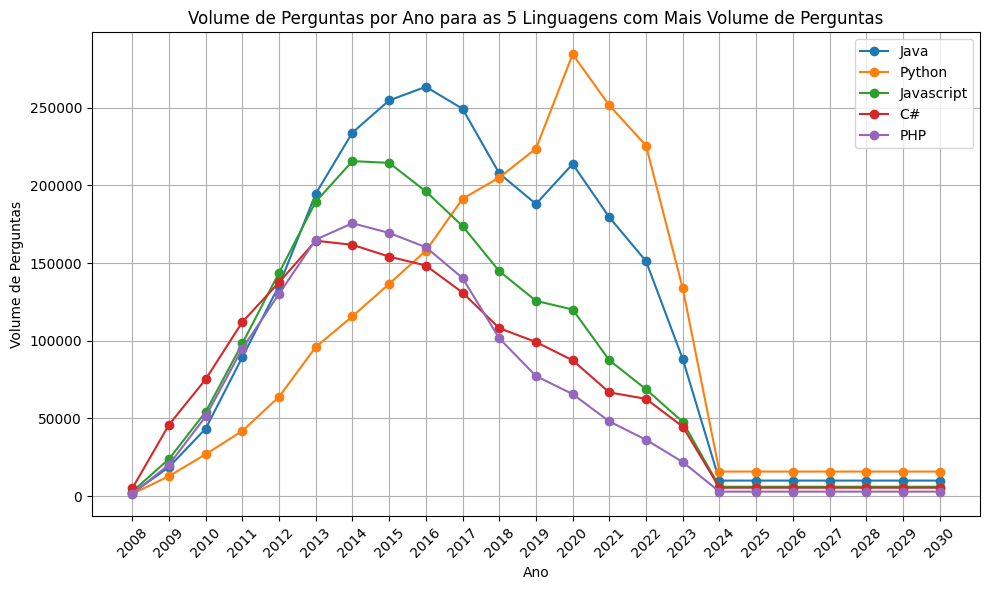

In [184]:
# Adicionar estimativas para os anos de 2025 a 2029
for year in range(2025, 2031):
    df_yearly_sum.loc[year] = np.nan

# Interpolar os valores ausentes para estimar os dados para os anos de 2025 a 2029
df_yearly_sum.interpolate(method='linear', inplace=True)  # Interpolação linear


# Calcular o total de perguntas para cada linguagem ao longo de todos os anos
soma_por_linguagem = df_yearly_sum.sum()

# Selecionar as 5 linguagens com mais volume de perguntas
top_linguagens = soma_por_linguagem.nlargest(5).index

# Filtrar o DataFrame para incluir apenas as 5 linguagens com mais volume de perguntas
df_top_linguagens = df_yearly_sum[top_linguagens]

# Plotar os dados
plt.figure(figsize=(10, 6))

# Iterar sobre as linguagens com mais volume de perguntas para plotar cada uma
for linguagem in df_top_linguagens.columns:
    plt.plot(df_top_linguagens.index, df_top_linguagens[linguagem], marker='o', label=linguagem)

# Adicionar rótulos aos eixos e título ao gráfico
plt.xlabel('Ano')
plt.ylabel('Volume de Perguntas')
plt.title('Volume de Perguntas por Ano para as 5 Linguagens com Mais Volume de Perguntas')
plt.legend()
plt.grid(True)

# Ajustar os ticks do eixo x para incluir todos os anos disponíveis
plt.xticks(df_yearly_sum.index, rotation=45)

# Mostrar o gráfico
plt.tight_layout()
plt.show()

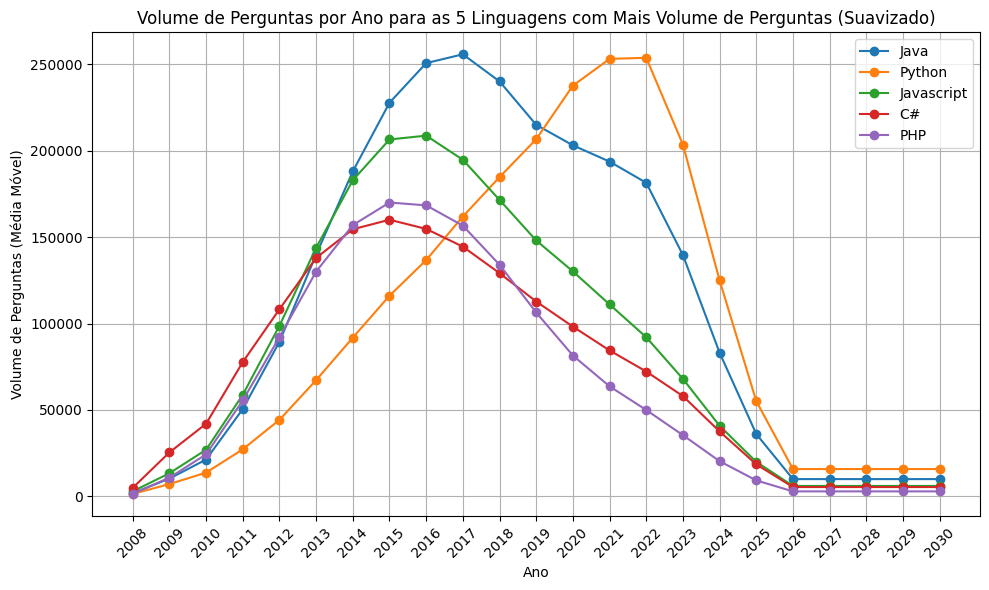

In [185]:
# Carregar o DataFrame a partir do arquivo CSV
df = pd.read_csv(r'C:\Users\mayco\Desktop\PROJETOS PYTHON\PYTHON\STACKOVERFLOW\BASE\TotalQuestions.csv')

# Converter a coluna 'Month' para o formato de data do pandas e extrair o ano
df['Year'] = pd.to_datetime(df['Month']).dt.year

# Selecionar apenas colunas numéricas para cálculo de soma
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Agrupar os dados pelo ano e calcular a soma das colunas numéricas
df_yearly_sum = df.groupby('Year')[numeric_columns].sum()

# Adicionar estimativas para os anos de 2025 a 2029
for year in range(2025, 2031):
    df_yearly_sum.loc[year] = np.nan

# Interpolar os valores ausentes para estimar os dados para os anos de 2025 a 2029
df_yearly_sum.interpolate(method='linear', inplace=True)  # Interpolação linear

# Calcular a média móvel para suavizar os dados e destacar padrões sazonais
window_size = 3  # Tamanho da janela da média móvel
df_yearly_sum_smoothed = df_yearly_sum.rolling(window=window_size, min_periods=1).mean()

# Calcular o total de perguntas para cada linguagem ao longo de todos os anos
soma_por_linguagem = df_yearly_sum_smoothed.sum()

# Selecionar as 5 linguagens com mais volume de perguntas
top_linguagens = soma_por_linguagem.nlargest(5).index

# Filtrar o DataFrame para incluir apenas as 5 linguagens com mais volume de perguntas
df_top_linguagens = df_yearly_sum_smoothed[top_linguagens]

# Plotar os dados
plt.figure(figsize=(10, 6))

# Iterar sobre as linguagens com mais volume de perguntas para plotar cada uma
for linguagem in df_top_linguagens.columns:
    plt.plot(df_top_linguagens.index, df_top_linguagens[linguagem], marker='o', label=linguagem)

# Adicionar rótulos aos eixos e título ao gráfico
plt.xlabel('Ano')
plt.ylabel('Volume de Perguntas (Média Móvel)')
plt.title('Volume de Perguntas por Ano para as 5 Linguagens com Mais Volume de Perguntas (Suavizado)')
plt.legend()
plt.grid(True)

# Ajustar os ticks do eixo x para incluir todos os anos disponíveis
plt.xticks(df_yearly_sum.index, rotation=45)

# Mostrar o gráfico
plt.tight_layout()
plt.show()
